# Transformada de Fourier discreta (DFT)

<div class="alert alert-block alert-warning">
Este notebook es parte de una colección de apuntes para el curso IEE2103 Señales y Sistemas, <a href="http://https://www.ing.uc.cl/electrica/">Departamento de Ingeniería Eléctrica</a>, <a href="http://www.uc.cl">Pontificia Universidad Católica de Chile</a>.<br> Profesor: <a href="http://www.rodrigocadiz.com">Rodrigo F. Cádiz</a><br>
Consultas y comentarios: <a href="mailto:rcadiz@ing.puc.cl">rcadiz@ing.puc.cl</a>

</div>

***

## Propiedades de la DFT

Para efectos de las siguientes propiedades de la DFT utilizaremos, las siguientes definiciones:

\begin{equation}
\boxed{\tilde{F}[k] = \frac{1}{N} \sum_{n=0}^{N-1} \tilde{f}[n] \; e^{-i k \frac{2 \pi}{N} n} = \frac{1}{N} \sum_{n=0}^{N-1} \tilde{f}[n] \; w_N^{k n} }
\end{equation}

\begin{equation}
\boxed{\tilde{f}[n] = \sum_{k=0}^{N-1} \tilde{F}[k] \; e^{i k \frac{2 \pi}{N} n} = \sum_{n=0}^{N-1} \tilde{f}[n] \; w_N^{-k n}}
\end{equation}

***

### Dualidad

$$ \text{DFT}_N \{ \text{DFT}_N\{\tilde{f}[n]\} \} = \frac{1}{N}\tilde{f}[-n] $$


### Conjugado

$$ \tilde{f}^{*}[n] \rightarrow \tilde{F}^{*}[-k] $$

### Inverso

$$ \tilde{f}[-n] \rightarrow \tilde{F}[-k] $$

### Superposición

$$ \tilde{f}[n] + \tilde{g}[n] \rightarrow \tilde{F}[k] + \tilde{G}[k] $$

si es que $f$ y $g$ tienen el mismo período.

### Desplazamiento 

$$ \tilde{f}[n-a] \rightarrow e^{i2\pi ka/N}\tilde{F}[k] $$

con $a \in \mathbb{Z}$

### Operador diferencial

$$ \tilde{f}[n] - \tilde{f}[n-a] \rightarrow (1 - e^{-i 2 \pi ka/N})\tilde{F}[k] $$

con $a \in \mathbb{Z}$ y $[n-a] = (n - a) \text{mod} N$.

### Suma

$$ \sum_{\kappa=0}^{n} \tilde{f}[\kappa] \rightarrow \frac{ \tilde{F}[k] - \tilde{F}[0]}{1 - e^{-i2 \pi k/N}} \; \; \; \text{para } k \neq 0 $$

El valor en 0 es 

$$ \tilde{F}[0] = \frac{1}{N}\sum_{n=0}^{N-1}\sum_{\kappa=0}^{n} \tilde{f}[\kappa] $$

### Convolución cíclica,  periódica o circular

$$ \tilde{f}[n] \circledast_{N} \tilde{g}[n] \rightarrow N \tilde{F}[k]\tilde{G}[k] $$

Esta propiedad dice que, para el caso de señales periódicas, la multiplicación de las DFTs de dos señales periódicas es equivalente a la convolución cíclica entre ambas señales, no la convolución lineal. Por lo tanto no es posible utilizar esta propiedad para calcular la salida de un sistema tomando las DFTs de la entrada y la respuesta al impulso y después multiplicando. Sin embargo, [bajo ciertas condiciones la convolución cíclica puede ser utilizada para calcular la convolución lineal](./28-Convolucion_discreta.ipynb#equivalencia_lineal_periodica). Esto se logra mediante el [acolchamiento](#acolchamiento) de ambas señales.

### Producto

$$ \tilde{f}[n] \tilde{g}[n] \rightarrow \tilde{F}[k] \circledast_{N} \tilde{G}[k] $$

para señales del mismo período $N$.

### Area

$$ \sum_{n=0}^{N-1} \tilde{f}[n] = N\tilde{F}[0] $$

### Valor central

$$ \tilde{f}[0] = \sum_{k=0}^{N-1}\tilde{F}[k] $$

### Rayleigh o Energía

$$ \sum_{n=0}^{N-1} |\tilde{f}[n]|^2 = N \sum_{k=0}^{N-1} |\tilde{F}[k]|^2 $$

<a name="acolchamiento"></a>
### Acolchamiento (zero padding)
El acolchamiento consiste en extender el largo de una señal mediante la inserción de ceros hasta completar un nuevo largo. El resultado de esta operación en el dominio de la frecuencia es que el espectro se interpola con nuevas muestras, de acuerdo a cuantos ceros se insertan.

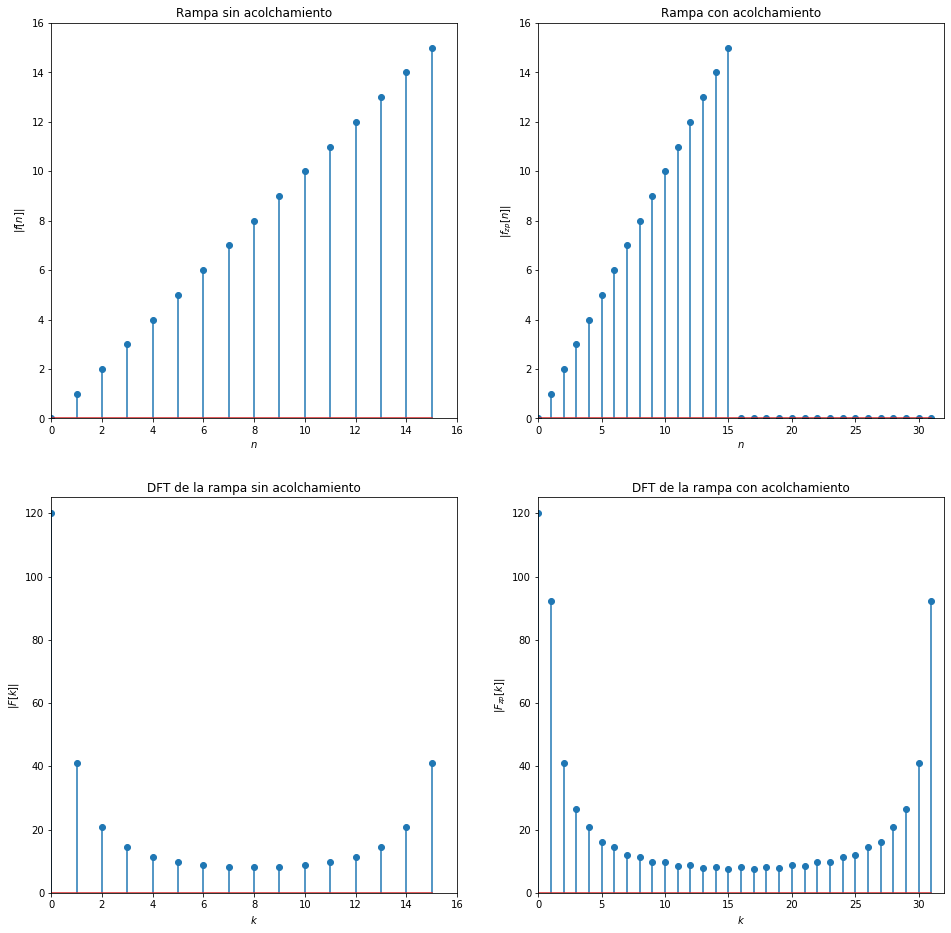

In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 16  # length of the signal
M = 32  # length of zero-padded signal

f = np.arange(N)*np.ones(N)
F = np.fft.fft(f)
# DFT of the zero-padded exponential signal
fzp = np.concatenate((f, np.zeros(M-N)))
Fzp = np.fft.fft(fzp)


# plot spectra
plt.figure(figsize = (16, 16))

plt.subplot(221)
plt.stem(np.arange(N),f,use_line_collection=True)
plt.title(r'Rampa sin acolchamiento')
plt.xlabel(r'$n$')
plt.ylabel(r'$|f[n]|$')
plt.axis([0, N, 0, N])

plt.subplot(222)
plt.stem(np.arange(M),fzp,use_line_collection=True)
plt.title(r'Rampa con acolchamiento')
plt.xlabel(r'$n$')
plt.ylabel(r'$|f_{zp}[n]|$')
plt.axis([0, M, 0, N]);


plt.subplot(223)
plt.stem(np.arange(N),np.abs(F),use_line_collection=True)
plt.title(r'DFT de la rampa sin acolchamiento')
plt.xlabel(r'$k$')
plt.ylabel(r'$|F[k]|$')
plt.axis([0, N, 0, 125])

plt.subplot(224)
plt.stem(np.arange(M),np.abs(Fzp),use_line_collection=True)
plt.title(r'DFT de la rampa con acolchamiento')
plt.xlabel(r'$k$')
plt.ylabel(r'$|F_{zp}[k]|$')
plt.axis([0, M, 0, 125]);

### Estiramiento 
El estiramiento consiste en extender el largo de una señal mediante la inserción de ceros muestra por medio, hasta completar un nuevo largo. El resultado de esta operación en el dominio de la frecuencia es que el espectro se replica tantas veces como muestras por medio se han agregado ceros.

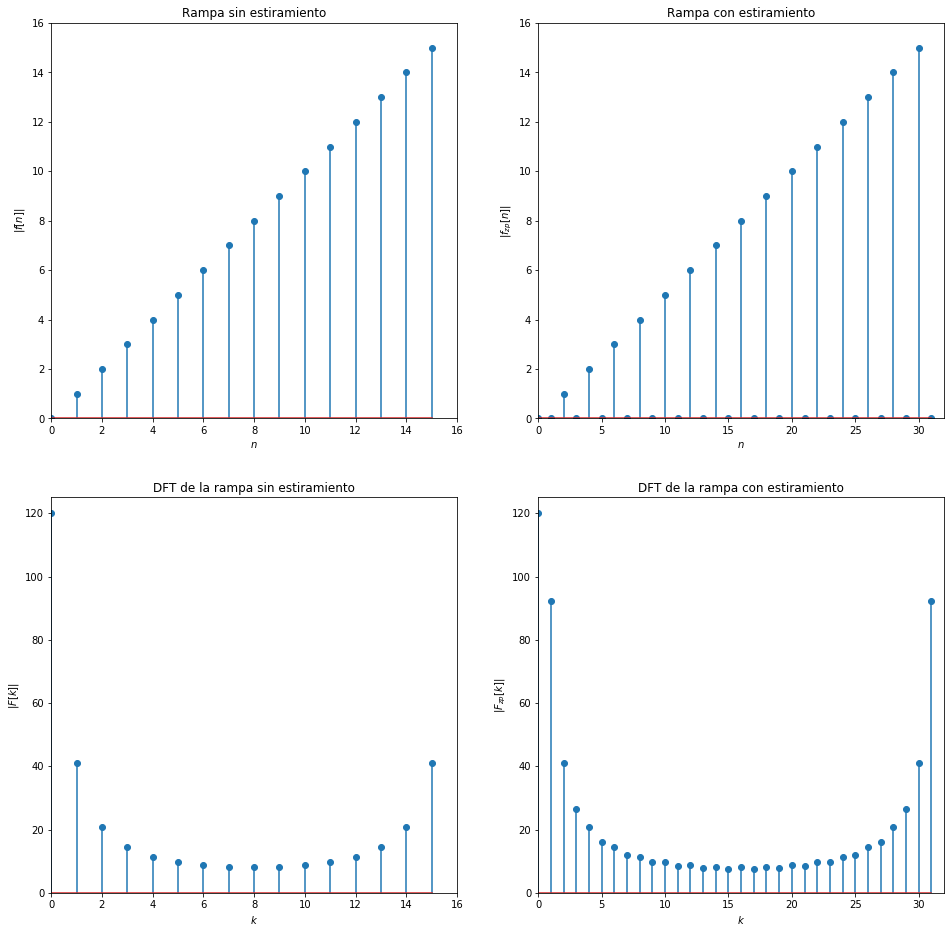

In [34]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 16  # length of the signal
M = 32  # length of zero-padded signal

f = np.arange(N)*np.ones(N)
F = np.fft.fft(f)
# DFT of the zero-padded exponential signal

z = np.zeros(N)
fest = np.dstack((f,z)).flatten()
Fest = np.fft.fft(fzp)


# plot spectra
plt.figure(figsize = (16, 16))

plt.subplot(221)
plt.stem(np.arange(N),f,use_line_collection=True)
plt.title(r'Rampa sin estiramiento')
plt.xlabel(r'$n$')
plt.ylabel(r'$|f[n]|$')
plt.axis([0, N, 0, N])

plt.subplot(222)
plt.stem(np.arange(M),fest,use_line_collection=True)
plt.title(r'Rampa con estiramiento')
plt.xlabel(r'$n$')
plt.ylabel(r'$|f_{zp}[n]|$')
plt.axis([0, M, 0, N]);


plt.subplot(223)
plt.stem(np.arange(N),np.abs(F),use_line_collection=True)
plt.title(r'DFT de la rampa sin estiramiento')
plt.xlabel(r'$k$')
plt.ylabel(r'$|F[k]|$')
plt.axis([0, N, 0, 125])

plt.subplot(224)
plt.stem(np.arange(M),np.abs(Fest),use_line_collection=True)
plt.title(r'DFT de la rampa con estiramiento')
plt.xlabel(r'$k$')
plt.ylabel(r'$|F_{zp}[k]|$')
plt.axis([0, M, 0, 125]);

<div class="alert alert-block alert-warning">
<b>Copyright</b><br>

Estos apuntes están licenciados bajo la licencia <a href="https://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0</a>.<br>
Como citar: <i>Rodrigo F. Cádiz, Apuntes de Señales y Sistemas.</i>
</div>